# US Interventions

Import and explore state- and county-level intervention data (source: [NYTimes](https://www.nytimes.com/interactive/2020/us/coronavirus-stay-at-home-order.html), accessed 30 March 2020 @ 16:00)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from interventions import load_formatted_us_intervention_data

In [2]:
# interventions_url = 'https://www.nytimes.com/interactive/2020/us/coronavirus-stay-at-home-order.html'
# home_dir = os.path.expanduser("~") + os.path.sep
# file_path = home_dir + "data/covid/nytimes_intervention_data.html"

print('Loading data for available states:')
interv_df = load_formatted_us_intervention_data()

interv_df.sample(n=15).head(15).sort_values('state_name')

Loading data for available states:
Found file matching pattern:
  /Users/aberk/data/covid/us-interventions-by-county_accessed_20200403.csv
Loading CSV file from:
  /Users/aberk/data/covid/us-interventions-by-county_accessed_20200403.csv


state_name state_code  population        order_type  \
17       Maryland         MD     6000000      Stay at home   
21    Mississippi         MS     3000000  Shelter in place   
59       Oklahoma         OK      401000  Shelter in place   
34      Tennessee         TN     6800000      Stay at home   
98          Texas         TX      567000      Stay at home   
80          Texas         TX      866000   Shelter at home   
92          Texas         TX      230000      Stay at home   
69          Texas         TX     1000000      Stay at home   
97          Texas         TX       22000  Shelter in place   
96          Texas         TX      132000  Shelter in place   
77          Texas         TX     4700000      Stay at home   
67          Texas         TX      424000  Shelter in place   
71          Texas         TX      859000      Stay at home   
64          Texas         TX      356000  Shelter in place   
38  West Virginia         WV     1800000      Stay at home   

          effective_on  state_wide         place_name  
17 2020-03-30 08:00:00        True                NaN  
21 2020-04-03 05:00:00        True                NaN  
59 2020-03-28 11:59:00       False              Tulsa  
34 2020-03-31 11:59:00        True                NaN  
98 2020-03-24 11:59:00       False  Williamson County  
80 2020-03-26 11:59:00       False    Hildalgo County  
92 2020-03-27 11:59:00       False       Smith County  
69 2020-03-24 00:00:00       False      Collin County  
97 2020-03-26 11:01:00       False     Willacy County  
96 2020-03-27 11:59:00       False     Wichita County  
77 2020-03-24 11:59:00       False      Harris County  
67 2020-03-25 12:01:00       False     Cameron County  
71 2020-03-25 11:59:00       False      Denton County  
64 2020-03-23 11:59:00       False        Bell County  
38 2020-03-24 08:00:00        True                NaN

In [4]:
avg_effective_on = interv_df.groupby(['state_name']).apply(lambda x: x.effective_on.mean())

In [5]:
fig, ax = plt.subplots(2,1,figsize=(12,7))
counts, bins, patches = ax[1].hist(interv_df.effective_on.values, bins=20)
ax[1].set_title('Date histogram for Statewide and County-level Ordinances')
ax[0].hist(avg_effective_on.values, bins=bins);
ax[0].set_title('Date histogram for Statewide Ordinances')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Count')
ax[0].set_ylabel('Count')
plt.tight_layout()


In [6]:
pd.value_counts(interv_df.order_type)

Stay at home             76
Shelter in place         22
Stay at home advisory     1
Curfew                    1
Healthy at home           1
Shelter at home           1
Name: order_type, dtype: int64

# US data

Source: NYTimes ([article](https://www.nytimes.com/article/coronavirus-county-data-us.html) and [data](https://github.com/nytimes/covid-19-data), accessed on 30 March 2020 @ 14:00)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
state_data = pd.read_csv('/Users/aberk/data/covid/covid-19-data/us-states.csv')
county_data = pd.read_csv('/Users/aberk/data/covid/covid-19-data/us-counties.csv')

In [27]:
(state_data[['date', 'state', 'cases']]
 .pivot_table(index='date', columns=['state'])
 .plot(legend=False, figsize=(15,5))
)
plt.yscale('log')

(10, 2000)

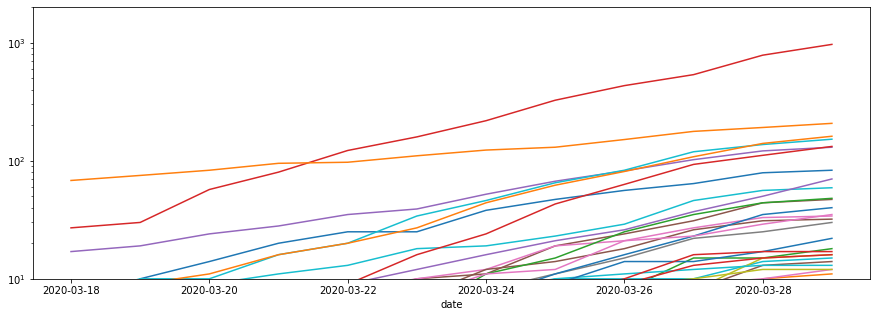

In [30]:
state_data[['date', 'state', 'deaths']].loc[state_data.date >= '2020-03-18'].pivot_table(index='date', columns=['state']).plot(legend=False, figsize=(15,5))
plt.yscale('log')
plt.ylim(10, 2000)

In [28]:
incidence_by_state = (
    state_data
    .sort_values('date')
    .reset_index(drop=True)
    .groupby(['state'])
    .apply(lambda x: x.cases.diff())
    .reset_index(level=0)
)


In [29]:
state_data = (
    state_data
    .sort_values('date')
    .reset_index(drop=True)
    .sort_values(['state', 'date'])
)

state_data['incidence'] = incidence_by_state.cases

In [30]:
state_incidence_pivoted = (
    state_data[['date', 'state', 'incidence']]
    .loc[(state_data.date > '2020-02-28') & 
         state_data.state.isin(
             ['Alaska', 'Alabama', 'California', 'Florida', 'Idaho', 'New York', 'Wyoming']
         )]
    .pivot_table(index='date', columns='state')
)

In [31]:
state_incidence_pivoted.columns = state_incidence_pivoted.columns.get_level_values(1)

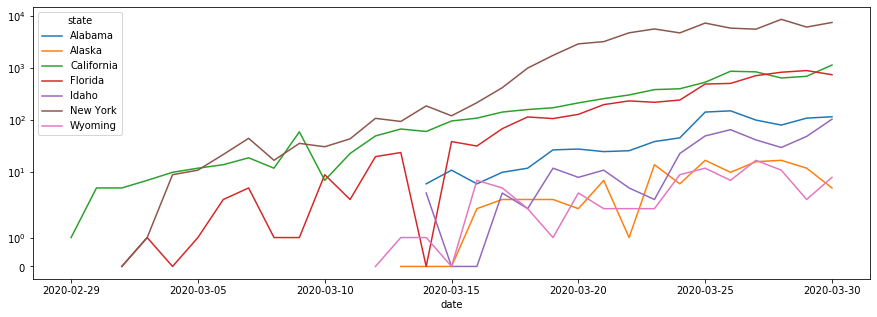

In [40]:
state_incidence_pivoted.plot(figsize=(15,5))
plt.yscale('symlog')

date    state  fips  cases  deaths  incidence
612   2020-03-13  Alabama     1      6       0        NaN
664   2020-03-14  Alabama     1     12       0        6.0
718   2020-03-15  Alabama     1     23       0       11.0
782   2020-03-16  Alabama     1     29       0        6.0
823   2020-03-17  Alabama     1     39       0       10.0
...          ...      ...   ...    ...     ...        ...
1303  2020-03-26  Wyoming    56     56       0        7.0
1335  2020-03-27  Wyoming    56     73       0       17.0
1401  2020-03-28  Wyoming    56     84       0       11.0
1453  2020-03-29  Wyoming    56     87       0        3.0
1553  2020-03-30  Wyoming    56     95       0        8.0

[1554 rows x 6 columns]

# Finding growth trends

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from interventions import load_formatted_us_intervention_data
from data import load_us_state_data, subset_by_state
from viz import plot_response_by_shifted_day, plot_pred_on_thirds
from model import fit_models_on_thirds, predict_on_shifted_day, print_lm_summary, get_shifted_day_for_interventions
from CONST import get_dbdir

/Users/aberk/anaconda/envs/py37/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#%pdb
confirmed, deaths = load_us_state_data()

In [3]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

In [4]:
FIG_DIR = os.path.join(get_dbdir(), 'fig/')
cases_max_date = confirmed.Date.max().date().isoformat()
deaths_max_date = deaths.Date.max().date().isoformat()
cases_plot_fname = f'US_confirmed_cases_vs_shifted_day_{cases_max_date}.pdf'
deaths_plot_fname = f"US_deaths_vs_shifted_day_{deaths_max_date}.pdf"

In [5]:
plot_response_by_shifted_day(confirmed, rot=60, figsize=(15,7))
plt.savefig(os.path.join(FIG_DIR, cases_plot_fname), dpi=300)

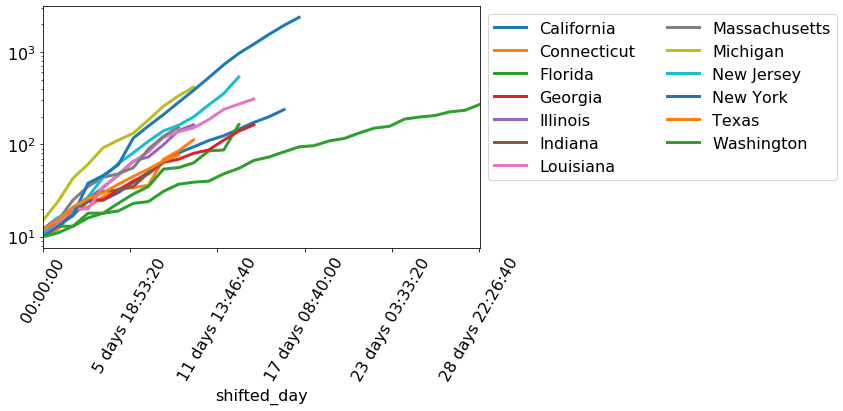

In [6]:
plot_response_by_shifted_day(deaths, 'deaths', rot=60)
plt.savefig(os.path.join(FIG_DIR, deaths_plot_fname), dpi=300)

In [7]:
lm_dict_confirmed, coef_confirmed = fit_models_on_thirds(confirmed, verbose=False)
lm_dict_deaths, coef_deaths = fit_models_on_thirds(deaths, 'deaths', verbose=False)
lm_summary = print_lm_summary(coef_confirmed, coef_deaths, partial=False)
lm_summary.to_csv(os.path.join(get_dbdir(), f'data/lm_coef_summary_cases_{cases_max_date}_deaths_{deaths_max_date}.csv'))
lm_summary.dropna()

Province_State  coef_init_case  ...  coef_init_death  coef_final_death
3      California        0.228125  ...         0.187340          0.161368
5     Connecticut        0.244085  ...         0.320927          0.242196
8         Florida        0.327016  ...         0.147743          0.289345
9         Georgia        0.331251  ...         0.241240          0.189201
10       Illinois        0.385113  ...         0.229766          0.249315
11        Indiana        0.344846  ...         0.174153          0.232444
15      Louisiana        0.368785  ...         0.286220          0.182770
18  Massachusetts        0.143181  ...         0.410490          0.274158
19       Michigan        0.506081  ...         0.526575          0.238129
25     New Jersey        0.415266  ...         0.291697          0.327806
27       New York        0.275146  ...         0.387264          0.235588
36          Texas        0.397812  ...         0.279808          0.177411
39     Washington        0.268983  ...         0.140824          0.087703

[13 rows x 5 columns]

In [8]:
confirmed2 = predict_on_shifted_day(confirmed, lm_dict_confirmed)
deaths2 = predict_on_shifted_day(deaths, lm_dict_deaths)

In [9]:
interv_df = load_formatted_us_intervention_data()
interv_df_death_shift = get_shifted_day_for_interventions(interv_df, deaths)
interv_df_case_shift = get_shifted_day_for_interventions(interv_df, confirmed)

Found file matching pattern:
  /Users/aberk/data/covid/us-interventions-by-county_accessed_20200403.csv
Loading CSV file from:
  /Users/aberk/data/covid/us-interventions-by-county_accessed_20200403.csv


In [10]:
from viz import add_ordinance_vlines_to_axes

In [12]:
fig, axx = plot_pred_on_thirds(deaths2, 'deaths', use_subplots=True)
add_ordinance_vlines_to_axes(axx, interv_df_death_shift, events_df=deaths, event_name='deaths')
plt.tight_layout()
fig.savefig(os.path.join(FIG_DIR, f'cumulative_mortality_trends_vs_shifted_day_{deaths_max_date}.pdf'), dpi=300)

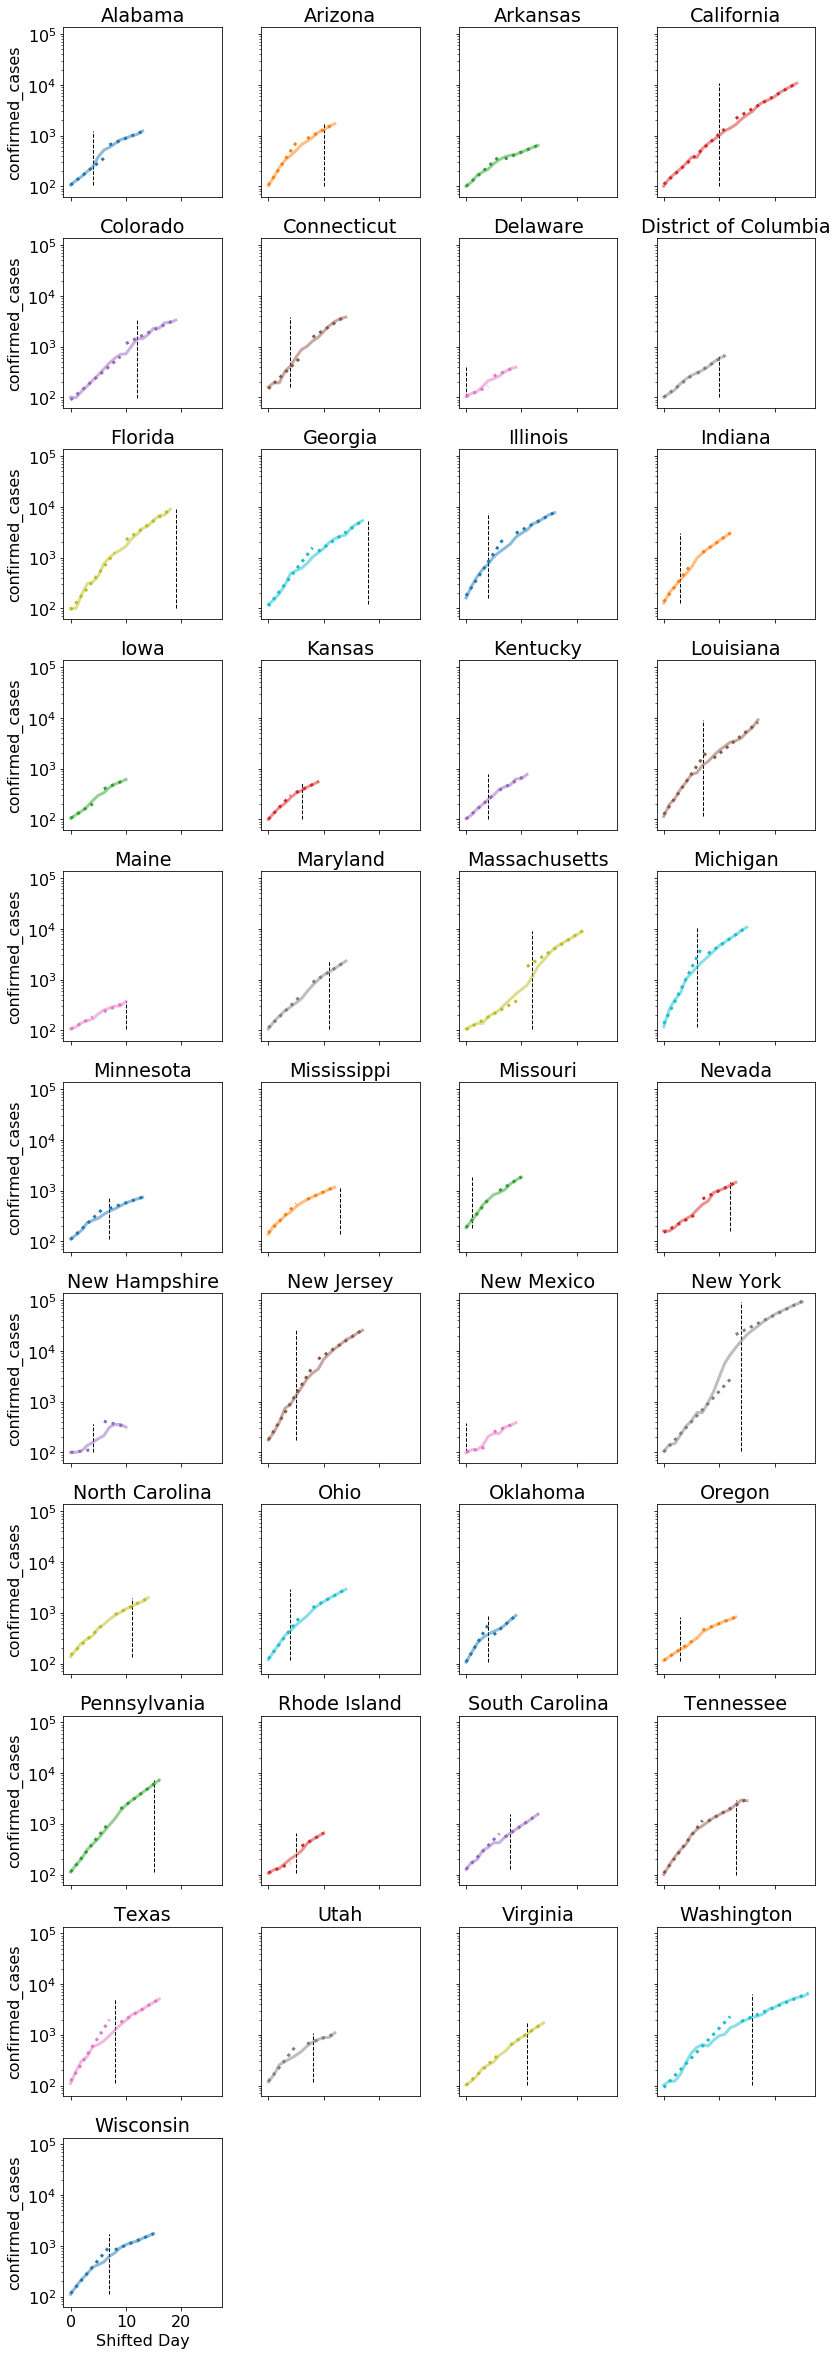

In [13]:
fig, axx = plot_pred_on_thirds(confirmed2, use_subplots=True)
add_ordinance_vlines_to_axes(axx, interv_df_case_shift, confirmed)
plt.tight_layout()
fig.savefig(os.path.join(FIG_DIR, f'confirmed_cases_trends_vs_shifted_day_{cases_max_date}.pdf'), dpi=300)

# Subsetting based on intervention date

In [134]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
lm = LinearRegression(normalize=True)

In [135]:
X = npr.randn(10, 5)
y = X.dot(np.ones(5))
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [137]:
from sklearn import metrics

In [139]:
import statsmodels.api as sm

In [141]:
lm.coef_

array([1., 1., 1., 1., 1.])

In [142]:
lm.intercept_

-4.996003610813204e-16

In [166]:
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
thing = results.summary()

/Users/aberk/anaconda/envs/py37/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [172]:
print(thing.as_csv())

                      OLS Regression Results                      
Dep. Variable:   ,y               ,  R-squared:         ,   1.000 
Model:           ,OLS             ,  Adj. R-squared:    ,   1.000 
Method:          ,Least Squares   ,  F-statistic:       ,1.669e+30
Date:            ,Fri, 10 Apr 2020,  Prob (F-statistic):,1.01e-60 
Time:            ,15:55:58        ,  Log-Likelihood:    ,  330.00 
No. Observations:,    10          ,  AIC:               ,  -648.0 
Df Residuals:    ,     4          ,  BIC:               ,  -646.2 
Df Model:        ,     5          ,                     ,         
Covariance Type: ,nonrobust       ,                     ,         
     ,   coef   , std err ,    t    ,P>|t| ,  [0.025 ,  0.975] 
const, 4.163e-17, 1.03e-15,    0.040, 0.970,-2.82e-15,  2.9e-15
x1   ,    1.0000, 6.45e-16, 1.55e+15, 0.000,    1.000,    1.000
x2   ,    1.0000, 1.05e-15, 9.54e+14, 0.000,    1.000,    1.000
x3   ,    1.0000,  8.5e-16, 1.18e+15, 0.000,    1.000,    1.000
x4   ,    

In [161]:
results.bse

array([1.03093550e-15, 6.45361884e-16, 1.04779715e-15, 8.50461962e-16,
       5.98828082e-16, 1.30272752e-15])

In [165]:
results.rsquared_adj

1.0

# Importing CityMapper Mobility Index Data

In [53]:
import numpy as np
import pandas as pd
from urllib import request
from bs4 import BeautifulSoup
from glob import glob
from CONST import get_data_dir, get_dbdir

In [54]:
DATA_DIR = get_data_dir()

In [2]:
cities = ['vancouver', 'toronto', 'montreal']

In [56]:
cmi_csv = {city: glob(DATA_DIR + f'citymapper/{city}*.csv')[0] for city in cities}
print(cmi_csv)

{'vancouver': '/Users/aberk/data/covid/citymapper/vancouver_mobility_index.csv', 'toronto': '/Users/aberk/data/covid/citymapper/toronto_mobility_index.csv', 'montreal': '/Users/aberk/data/covid/citymapper/montreal_mobility_index.csv'}


In [64]:
def parse_column_as_percent(df, col_name='relative_movement'):
    df[col_name] = df[col_name].apply(lambda x: int(x[:-1])/100)
    return df

In [75]:
cmi_df = {
    city: parse_column_as_percent(
        pd.read_csv(cmi_csv[city], parse_dates=['date'], skipinitialspace=True)
    ) for city in cities
}

In [79]:
cmi_df = pd.concat(cmi_df.values(), keys=cmi_df.keys()).reset_index(level=0).rename(columns={'level_0': 'city'})

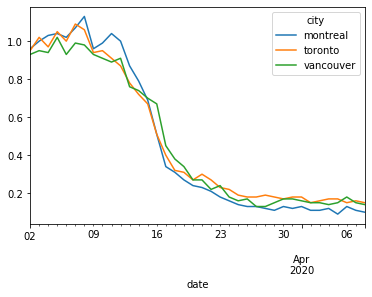

In [92]:
(cmi_df.pivot_table(index='date', columns=['city'])
 .droplevel(level=0, axis=1)
 .plot())

In [93]:
confirmed = pd.read_csv('/Users/aberk/data/covid/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [96]:
confirmed = confirmed.loc[confirmed['Country/Region'].isin(['Canada'])]

In [99]:
confirmed = (
    confirmed
    .rename(columns={
        'Province/State': 'Province', 
        'Country/Region': 'Country'})
    .filter(regex='(Province|Country|[0-9]+/[0-9]+/[0-9]+)')
)

In [103]:
confirmed = confirmed.melt(id_vars=['Province', 'Country'], var_name='Date', value_name='Count')

In [104]:
confirmed

Province Country     Date  Count
0                   Alberta  Canada  1/22/20      0
1          British Columbia  Canada  1/22/20      0
2            Grand Princess  Canada  1/22/20      0
3                  Manitoba  Canada  1/22/20      0
4             New Brunswick  Canada  1/22/20      0
...                     ...     ...      ...    ...
1165           Saskatchewan  Canada   4/8/20    260
1166       Diamond Princess  Canada   4/8/20      0
1167              Recovered  Canada   4/8/20      0
1168  Northwest Territories  Canada   4/8/20      5
1169                  Yukon  Canada   4/8/20      7

[1170 rows x 4 columns]

# Canada Census Data

In [181]:
census = pd.read_csv(get_data_dir() + 'canada-census-2016-population-density.csv', encoding='latin-1')

In [186]:
census2 = pd.read_csv(get_data_dir() + 'canada-census-subdivisions-2016-population-density.csv', encoding='latin-1')

In [191]:
census2.head()

Geographic code  Geographic name, english   Geographic name, french  \
0         1001101  Division No.  1, Subd. V  Division No.  1, Subd. V   
1         1001105       Portugal Cove South       Portugal Cove South   
2         1001113                 Trepassey                 Trepassey   
3         1001120               St. Shott's               St. Shott's   
4         1001124  Division No.  1, Subd. U  Division No.  1, Subd. U   

            CSD type, english           CSD type, french  \
0  Subdivision of unorganized  Subdivision non organisée   
1                        Town                       Town   
2                        Town                       Town   
3                        Town                       Town   
4  Subdivision of unorganized  Subdivision non organisée   

  Province / territory, english Province / territory, french  \
0     Newfoundland and Labrador      Terre-Neuve-et-Labrador   
1     Newfoundland and Labrador      Terre-Neuve-et-Labrador   
2     Newfoundland and Labrador      Terre-Neuve-et-Labrador   
3     Newfoundland and Labrador      Terre-Neuve-et-Labrador   
4     Newfoundland and Labrador      Terre-Neuve-et-Labrador   

   Geographic code, Province / territory  Geographic code, Census division  \
0                                   10.0                            1001.0   
1                                   10.0                            1001.0   
2                                   10.0                            1001.0   
3                                   10.0                            1001.0   
4                                   10.0                            1001.0   

   Geographic code, Census metropolitan area / census agglomeration  ...  \
0                                                NaN                 ...   
1                                                NaN                 ...   
2                                                NaN                 ...   
3                                                NaN                 ...   
4                                                NaN                 ...   

   2011 adjusted total private dwellings flag  \
0                                           F   
1                                           F   
2                                           F   
3                                           F   
4                                           T   

  Total private dwellings, % change  \
0                              68.7   
1                               1.1   
2                               6.3   
3                              18.2   
4                              67.4   

   Private dwellings occupied by usual residents, 2016  \
0                                               19.0     
1                                               69.0     
2                                              245.0     
3                                               38.0     
4                                              697.0     

  Private dwellings occupied by usual residents, 2011  \
0                                               28.0    
1                                               69.0    
2                                              258.0    
3                                               40.0    
4                                              635.0    

  2011 adjusted private dwellings occupied by usual residents flag  \
0                                                  F                 
1                                                  F                 
2                                                  F                 
3                                                  F                 
4                                                  T                 

  Private dwellings occupied by usual residents, % change  \
0                                              -32.1        
1                                                0.0        
2                                               -5.0        
3   

In [190]:
for x in census2['Geographic name, english'].sort_values().unique():
    print(x)

105 Mile Post 2
Abbey
Abbotsford
Abercorn
Aberdeen
Aberdeen No. 373
Abernethy
Abernethy No. 186
Abitibi 70
Abrams Village
Acadia No. 34
Acadieville
Acme
Acton Vale
Addington
Addington Highlands
Adelaide-Metcalfe
Adjala-Tosorontio
Admaston/Bromley
Admirals Beach
Adstock
Agats Meadow 8
Agency 1
Aguanish
Ahahswinis 1
Ahaminaquus 12
Ahtahkakoop 104
Air Ronge
Airdrie
Aitchelitch 9
Ajax
Aklavik
Akulivik
Akwesasne
Akwesasne (Part) 59
Alameda
Albanel
Alberni 2
Alberni-Clayoquot A
Alberni-Clayoquot B
Alberni-Clayoquot C
Alberni-Clayoquot D
Alberni-Clayoquot E
Alberni-Clayoquot F
Albert Flat 5
Alberta Beach
Alberton
Albertville
Alderville First Nation
Alert Bay
Alexander
Alexander 134
Alexandria
Alexis 133
Alexis 9
Alexis Creek 14
Alexis Creek 16
Alexis Creek 21
Alexis Creek 34
Alfred and Plantagenet
Algoma, Unorganized, North Part
Algoma, Unorganized, South East Part
Algonquin Highlands
Alice Beach
Alida
Alix
Alkali Lake 1
Alkali Lake 4A
Allan
Allardville
Alleyn-et-Cawood
Alliance
Allison Bay 2

Lohbiee 3
Lomond
Lomond No. 37
London
Lone Tree No. 18
Long Harbour-Mount Arlington Heights
Long Lake 58
Long Plain (Part) 6
Long Sault 12
Longlaketon No. 219
Longue-Pointe-de-Mingan
Longue-Rive
Longueuil
Longview
Loon Lake
Loon Lake 235
Loon Lake No. 561
Lord's Cove
Loreburn
Loreburn No. 254
Lorne
Lorraine
Lorrainville
Lost River No. 313
Lot  1
Lot  2
Lot  3
Lot  4
Lot  5
Lot  6
Lot  7
Lot  8
Lot  9
Lot 10
Lot 11
Lot 12
Lot 13
Lot 14
Lot 15
Lot 16
Lot 17
Lot 18
Lot 19
Lot 20
Lot 21
Lot 22
Lot 23
Lot 24
Lot 25
Lot 26
Lot 27
Lot 28
Lot 29
Lot 30
Lot 31
Lot 33
Lot 34
Lot 35
Lot 36
Lot 37
Lot 38
Lot 39
Lot 40
Lot 41
Lot 42
Lot 43
Lot 44
Lot 45
Lot 46
Lot 47
Lot 48
Lot 49
Lot 50
Lot 51
Lot 52
Lot 53
Lot 54
Lot 55
Lot 56
Lot 57
Lot 58
Lot 59
Lot 60
Lot 61
Lot 62
Lot 63
Lot 64
Lot 65
Lot 66
Lot 67
Lotbinière
Lougheed
Louis Bull 138B
Louis Creek 4
Louis Squinas Ranch 14
Louise
Louiseville
Lourdes
Love
Low
Lower Hat Creek 2
Lower Post
Lower Similkameen 2
Loyalist
Lucan Biddulph
Lucky Lake
Luck

Saint-Joseph-de-Coleraine
Saint-Joseph-de-Kamouraska
Saint-Joseph-de-Lepage
Saint-Joseph-de-Sorel
Saint-Joseph-des-Érables
Saint-Joseph-du-Lac
Saint-Jude
Saint-Jules
Saint-Julien
Saint-Just-de-Bretenières
Saint-Juste-du-Lac
Saint-Justin
Saint-Jérôme
Saint-Lambert
Saint-Lambert-de-Lauzon
Saint-Laurent-de-l'Île-d'Orléans
Saint-Lazare
Saint-Lazare-de-Bellechasse
Saint-Liboire
Saint-Liguori
Saint-Lin--Laurentides
Saint-Louis
Saint-Louis de Kent
Saint-Louis-de-Blandford
Saint-Louis-de-Gonzague
Saint-Louis-de-Gonzague-du-Cap-Tourmente
Saint-Louis-du-Ha! Ha!
Saint-Luc-de-Bellechasse
Saint-Luc-de-Vincennes
Saint-Lucien
Saint-Ludger
Saint-Ludger-de-Milot
Saint-Léandre
Saint-Léolin
Saint-Léon-de-Standon
Saint-Léon-le-Grand
Saint-Léonard
Saint-Léonard-d'Aston
Saint-Léonard-de-Portneuf
Saint-Magloire
Saint-Majorique-de-Grantham
Saint-Malachie
Saint-Malo
Saint-Marc-de-Figuery
Saint-Marc-des-Carrières
Saint-Marc-du-Lac-Long
Saint-Marc-sur-Richelieu
Saint-Marcel
Saint-Marcel-de-Richelieu
Saint-Marcel

# Canada data

See [this website](https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html#a1) for a [CSV available](https://health-infobase.canada.ca/src/data/covidLive/covid19.csv) from the government. I don't know that it is "good data". Maybe see what's available on the Slack channel? 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
from CONST import get_data_dir, get_dbdir

In [107]:
DATE = '20200410'
csv_filename = 'canada-covid19-accessed-{DATE}.csv'
canada = pd.read_csv(get_data_dir() + csv_filename.format(DATE=DATE))
canada.head()

pruid            prname              prnameFR        date  numconf  \
0     35           Ontario               Ontario  31-01-2020        3   
1     59  British Columbia  Colombie-Britannique  31-01-2020        1   
2      1            Canada                Canada  31-01-2020        4   
3     35           Ontario               Ontario  08-02-2020        3   
4     59  British Columbia  Colombie-Britannique  08-02-2020        4   

   numprob  numdeaths  numtotal  numtested  numrecover  percentrecover  \
0        0          0         3        NaN         NaN             NaN   
1        0          0         1        NaN         NaN             NaN   
2        0          0         4        NaN         NaN             NaN   
3        0          0         3        NaN         NaN             NaN   
4        0          0         4        NaN         NaN             NaN   

   ratetested  numtoday  percentoday  
0         NaN       3.0          3.0  
1         NaN       1.0          1.0  
2         NaN       4.0          4.0  
3         NaN       0.0          0.0  
4         NaN       3.0          3.0

In [129]:
canada.loc[canada.prname == "British Columbia"].plot('date', ['numtotal', 'numdeaths'])
plt.yscale('log')

In [130]:
canada.loc[canada.prname == "Ontario"].plot('date', ['numtotal', 'numdeaths'])
plt.yscale('log')

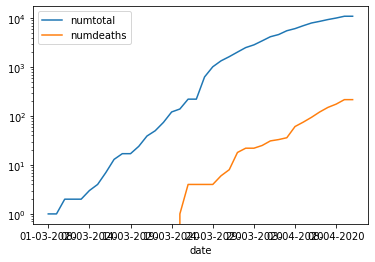

In [131]:
canada.loc[canada.prname == "Quebec"].plot('date', ['numtotal', 'numdeaths'])
plt.yscale('log')